# Interview round 2 : "Artificial Intelligence in the field of musculoskeletal health and big data" 



# Lower Back Pain Symptoms Dataset
Public Dataset available at https://www.kag![Overview.jpg](attachment:Overview.jpg)gle.com/datasets/sammy123/lower-back-pain-symptoms-dataset

# Overview 

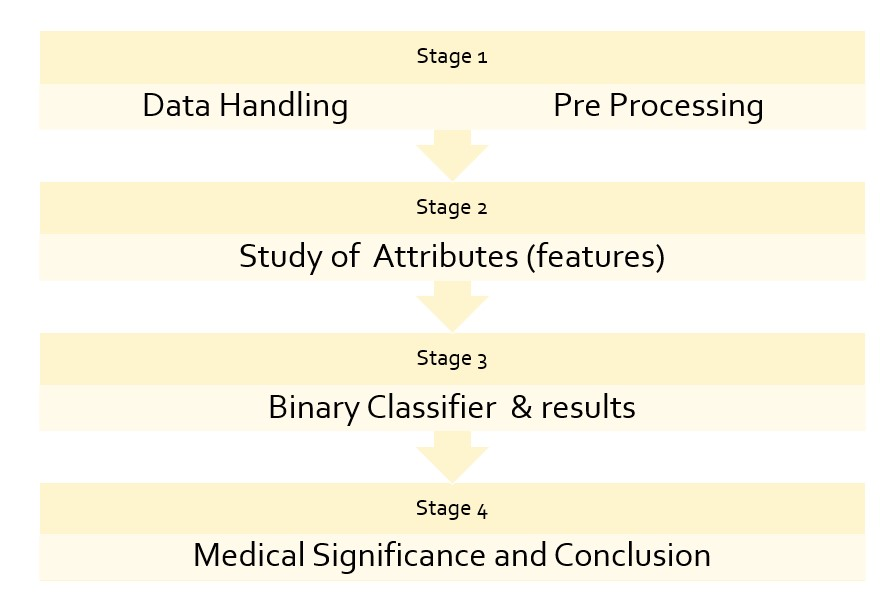

# Data Processing 

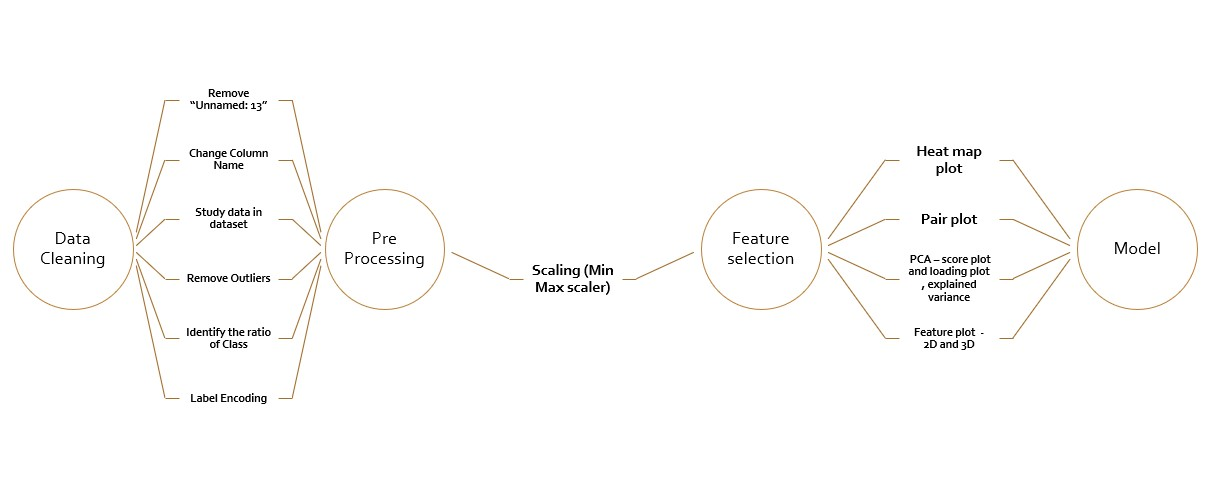

#  Data Handling Code

In [181]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import decomposition  # PCA

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import mean_squared_error   # For MSE error
from sklearn.metrics import classification_report
from sklearn import metrics

# Fetch Data and see the contents 

In [182]:
dataset = pd.read_csv("C:\\Users\\annab\\Dropbox\\My PC (DESKTOP-UARJA3T)\\Documents\\1. OSLOMET\\0. Thesis\\ACIT 5930 Phase 3\\writing\\PythonFiles_thesisReport\\SpineData_Interview\\Dataset_spine.csv")

In [183]:
dataset.head()

Col1       Col2       Col3       Col4        Col5       Col6  \
0  63.027817  22.552586  39.609117  40.475232   98.672917  -0.254400   
1  39.056951  10.060991  25.015378  28.995960  114.405425   4.564259   
2  68.832021  22.218482  50.092194  46.613539  105.985135  -3.530317   
3  69.297008  24.652878  44.311238  44.644130  101.868495  11.211523   
4  49.712859   9.652075  28.317406  40.060784  108.168725   7.918501   

       Col7     Col8     Col9     Col10      Col11    Col12 Class_att  \
0  0.744503  12.5661  14.5386  15.30468 -28.658501  43.5123  Abnormal   
1  0.415186  12.8874  17.5323  16.78486 -25.530607  16.1102  Abnormal   
2  0.474889  26.8343  17.4861  16.65897 -29.031888  19.2221  Abnormal   
3  0.369345  23.5603  12.7074  11.42447 -30.470246  18.8329  Abnormal   
4  0.543360  35.4940  15.9546   8.87237 -16.378376  24.9171  Abnormal   

                                         Unnamed: 13  
0                                                NaN  
1                                                NaN  
2  Prediction is done by using binary classificat...  
3                                                NaN  
4                                                NaN

In [184]:
# removing Unnecessary column
del dataset["Unnamed: 13"]

In [185]:
# Change the Column names
dataset.rename(columns = {
    "Col1" : "pelvic_incidence", 
    "Col2" : "pelvic_tilt",
    "Col3" : "lumbar_lordosis_angle",
    "Col4" : "sacral_slope", 
    "Col5" : "pelvic_radius",
    "Col6" : "degree_spondylolisthesis", 
    "Col7" : "pelvic_slope",
    "Col8" : "direct_tilt",
    "Col9" : "thoracic_slope", 
    "Col10" :"cervical_tilt", 
    "Col11" : "sacrum_angle",
    "Col12" : "scoliosis_slope", 
    "Class_att" : "class"}, inplace=True)

In [186]:
dataset.shape

(310, 13)

In [212]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt               310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   pelvic_slope              310 non-null    float64
 7   direct_tilt               310 non-null    float64
 8   thoracic_slope            310 non-null    float64
 9   cervical_tilt             310 non-null    float64
 10  sacrum_angle              310 non-null    float64
 11  scoliosis_slope           310 non-null    float64
 12  class                     310 non-null    object 
dtypes: float64(12), object(1)
memory usage: 31.6+ KB


## Understand attribute Class : abnormal and normal 

<AxesSubplot:>

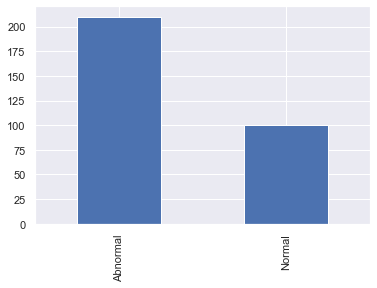

In [208]:
# find the ratio of class attributes ( abnormal and normal)
dataset["class"].value_counts().sort_index().plot.bar()

@ comment : abnormal datapoints are double the number than Normal datapoints

## features  closer analysis 

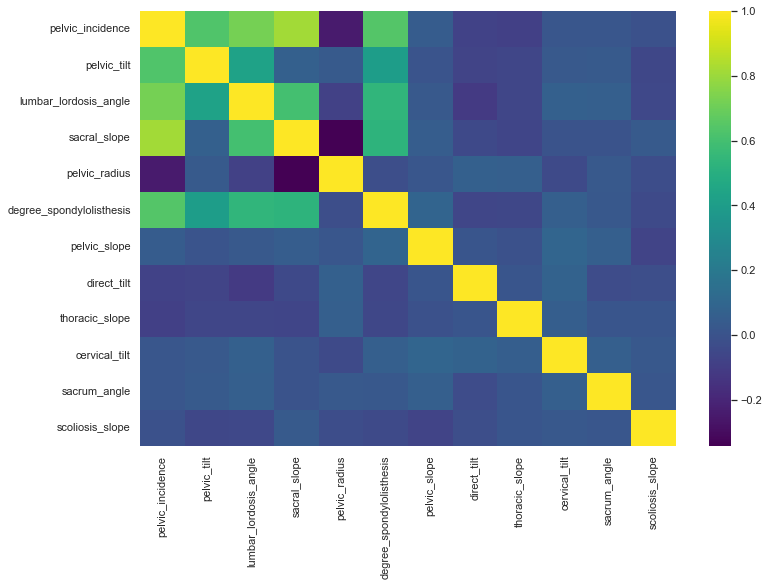

In [188]:
# Heat map plot 
# to plot with values : annot=True
plt.figure(figsize=(12,8))
p=sns.heatmap(dataset.corr(), cmap='viridis')  


 
sns.pairplot(dataset, hue="class")

pair plot
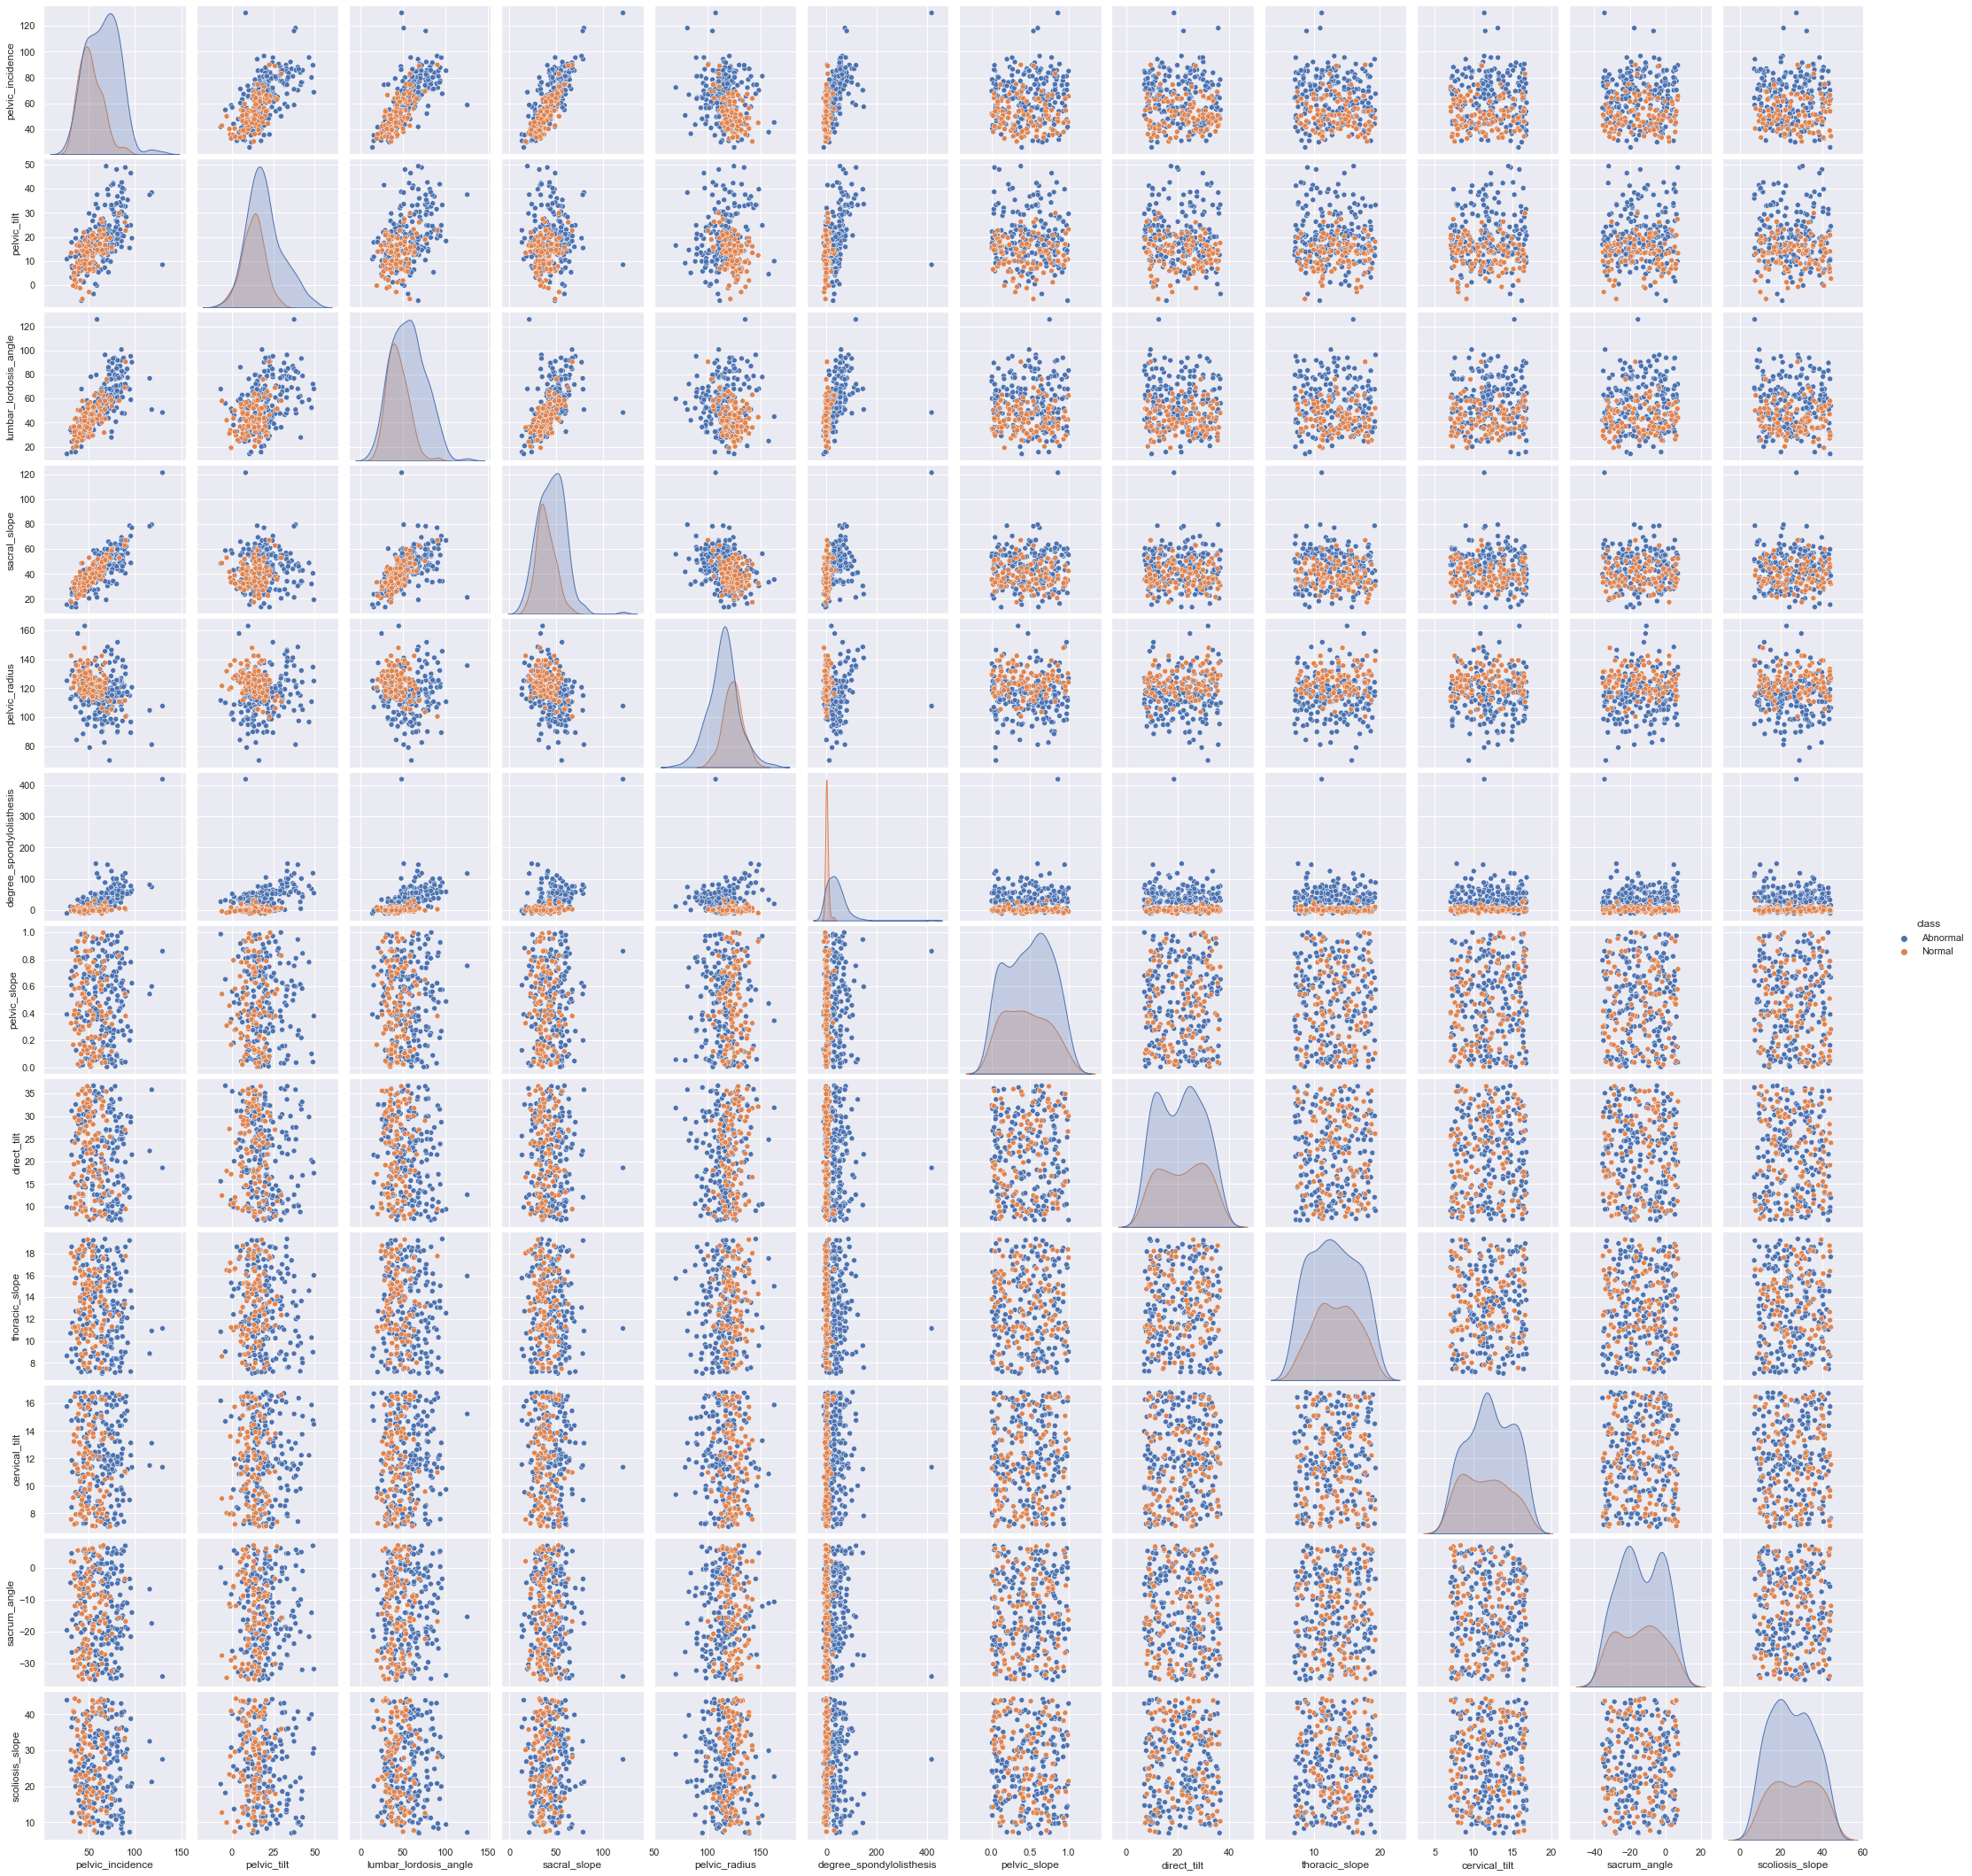

@ Comment on Features : First 6 features are intresting ( degree_spondylolisthesis , lumbar_lordosis_angle, sacral_slope ,pelvic_incidence pelvic_tilt ) needs closer observation

## detecting Outliers and its removal 

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(1, 0, 'pelvic_incidence'),
  Text(2, 0, 'pelvic_tilt'),
  Text(3, 0, 'lumbar_lordosis_angle'),
  Text(4, 0, 'sacral_slope'),
  Text(5, 0, 'pelvic_radius'),
  Text(6, 0, 'degree_spondylolisthesis'),
  Text(7, 0, 'pelvic_slope'),
  Text(8, 0, 'direct_tilt'),
  Text(9, 0, 'thoracic_slope'),
  Text(10, 0, 'cervical_tilt'),
  Text(11, 0, 'sacrum_angle'),
  Text(12, 0, 'scoliosis_slope')])

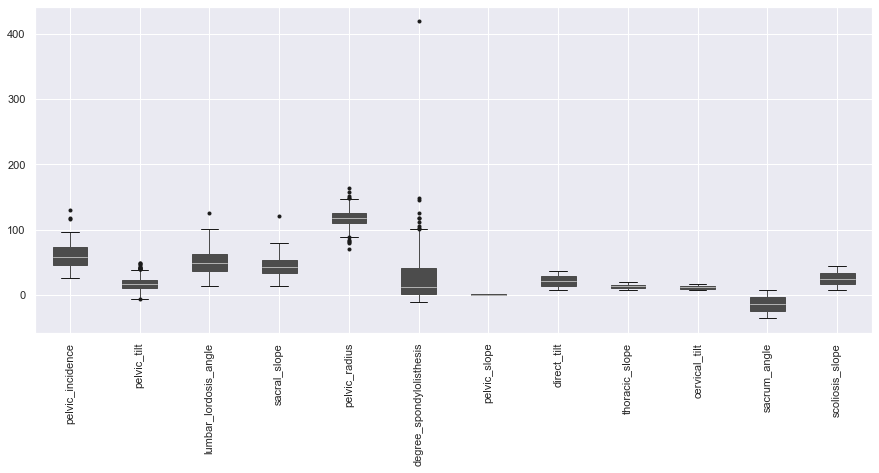

In [189]:
# ploting to visulaize Outliers column-wise

plt.subplots(figsize=(15,6))
dataset.boxplot(patch_artist=True, sym="k.")
plt.xticks(rotation=90)

In [190]:
#Detecting Outliers
#Inter Quartile Range is the distance between the 3rd Quartile and 1st Quartile

minimum = 0
maximum = 0

def detect_outlier(feature):
    first_q = np.percentile(feature, 25)
    third_q = np.percentile(feature, 75) 
    IQR = third_q - first_q
    IQR *= 1.5
    minimum = first_q - IQR 
    maximum = third_q + IQR
    flag = False
    
    if(minimum > np.min(feature)):
        flag = True
    if(maximum < np.max(feature)):
        flag = True
    
    return flag


#Using Tukey-Method to remove Outliers.
#Whiskers are set at 1.5 times Interquartile Range(IQR)

def  remove_outlier(feature):
    first_q = np.percentile(X[feature], 25)
    third_q = np.percentile(X[feature], 75)
    IQR = third_q - first_q
    IQR *= 1.5
    
    minimum = first_q - IQR # the acceptable minimum value
    maximum = third_q + IQR # the acceptable maximum value
    
    median = X[feature].median()
    
    """
    # any value beyond the acceptance range are considered
    as outliers. 
    # we replace the outliers with the median value of that 
      feature.
    """
    
    X.loc[X[feature] < minimum, feature] = median 
    X.loc[X[feature] > maximum, feature] = median

# taking all the columns except the last one
# last column is the label

X = dataset.iloc[:, :-1]
for i in range(len(X.columns)): 
        remove_outlier(X.columns[i])

In [191]:
X = dataset.iloc[:, :-1]

#Detecting Outliers column-wise
for i in range(len(X.columns)):
    if(detect_outlier(X[X.columns[i]])):
        print(X.columns[i], "Contains Outliers")

pelvic_incidence Contains Outliers
pelvic_tilt Contains Outliers
lumbar_lordosis_angle Contains Outliers
sacral_slope Contains Outliers
pelvic_radius Contains Outliers
degree_spondylolisthesis Contains Outliers


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(1, 0, 'pelvic_incidence'),
  Text(2, 0, 'pelvic_tilt'),
  Text(3, 0, 'lumbar_lordosis_angle'),
  Text(4, 0, 'sacral_slope'),
  Text(5, 0, 'pelvic_radius'),
  Text(6, 0, 'degree_spondylolisthesis'),
  Text(7, 0, 'pelvic_slope'),
  Text(8, 0, 'direct_tilt'),
  Text(9, 0, 'thoracic_slope'),
  Text(10, 0, 'cervical_tilt'),
  Text(11, 0, 'sacrum_angle'),
  Text(12, 0, 'scoliosis_slope')])

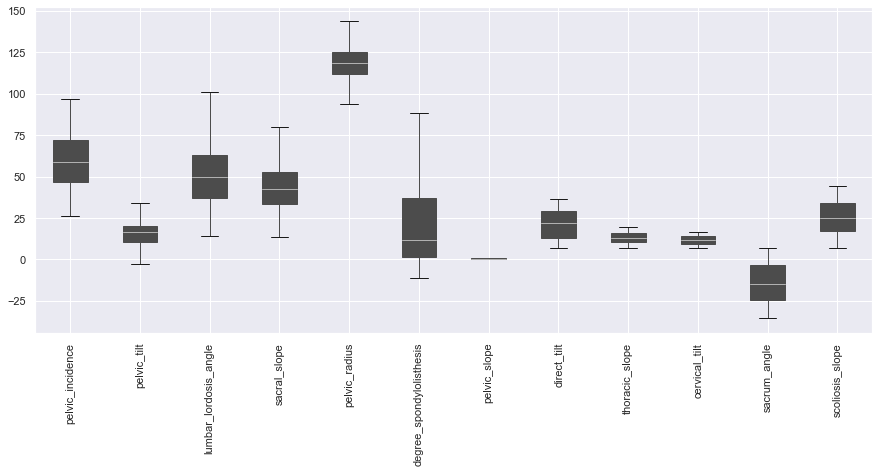

In [192]:
#Removing Outliers
for i in range (3):
    for i in range(len(X.columns)):
        remove_outlier(X.columns[i])
        
#After removing Outliers
plt.subplots(figsize=(15,6))
X.boxplot(patch_artist=True, sym="k.")
plt.xticks(rotation=90)

@ Comment : X has the data after removing the outliers 

## Preprocessing the Data for modelling  

In [193]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(X)


scaled_df = pd.DataFrame(data = scaled_data, columns = X.columns)
scaled_df.head()

pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
0          0.523049     0.684601               0.295226      0.408699   
1          0.183082     0.349535               0.126987      0.235632   
2          0.605368     0.675639               0.416076      0.501244   
3          0.611962     0.740938               0.349432      0.471552   
4          0.334210     0.338566               0.165053      0.402451   

   pelvic_radius  degree_spondylolisthesis  pelvic_slope  direct_tilt  \
0       0.099877                  0.108734      0.744554     0.186396   
1       0.415357                  0.157231      0.413783     0.197208   
2       0.246507                  0.075764      0.473750     0.666533   
3       0.163957                  0.224132      0.367741     0.556360   
4       0.290294                  0.190990      0.542524     0.957940   

   thoracic_slope  cervical_tilt  sacrum_angle  scoliosis_slope  
0        0.610506       0.845115      0.156861         0.977797  
1        0.854170       0.996300      0.230878         0.243812  
2        0.850409       0.983442      0.148026         0.327166  
3        0.461461       0.448790      0.113989         0.316741  
4        0.725757       0.188118      0.447450         0.479711

Label Encoding to convert the arrtibute class to numeric values instead of string

In [194]:
label = dataset["class"]

encoder = LabelEncoder()
label = encoder.fit_transform(label)
        # Abnormal =0 and Normal = 1
label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

# Attributes of Intrest

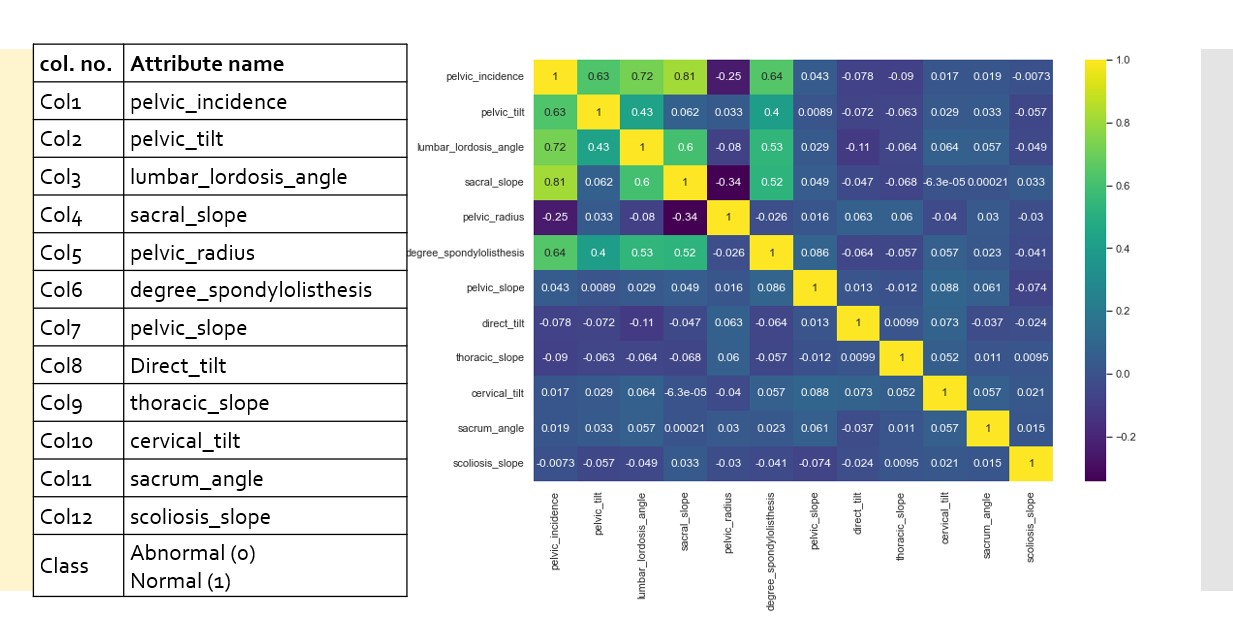


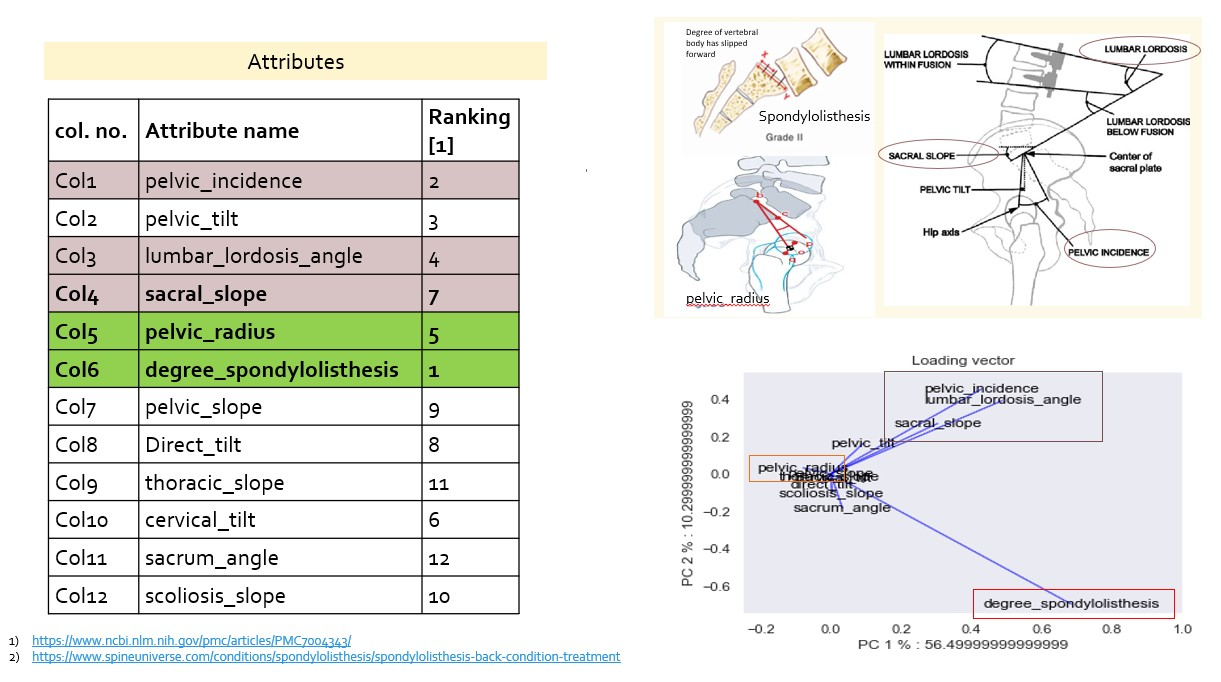

# 2D score plot in PCA  Vs Attribute plot
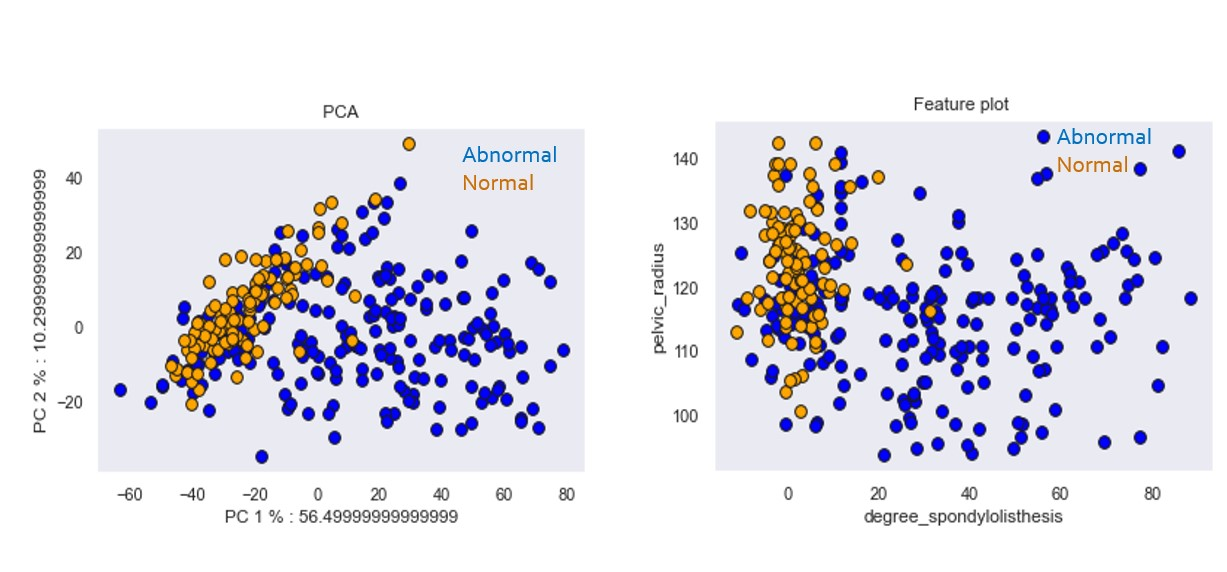

# PCA Analsyis for feature selection 

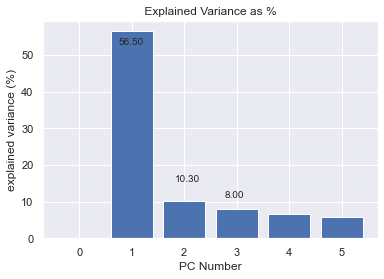

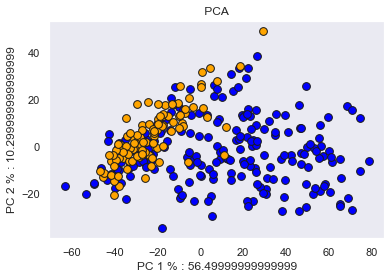

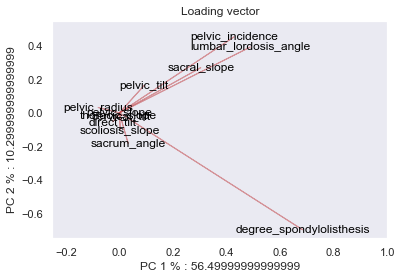

In [195]:

# PCA  and its paramters  
pca_inputData = X  # set the data whose PCA is to be calculated 
n_components=5  # set number of compoents for PCA 


data_after_pca = decomposition.PCA(n_components)  # create object 
PCA_data = data_after_pca.fit(pca_inputData)       # perform fit 

score_PCA =PCA_data.transform(pca_inputData)
scores_df= pd.DataFrame(score_PCA, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])  # for 10 components 


# get the PCA parameters 
explained_var_pca= PCA_data.explained_variance_ratio_            # explained variance for percentage 
explained_var_pca=np.insert(explained_var_pca, 0,0)   # to shift PC1 to pos1 from Pos0 
explained_var_pca= np.round(explained_var_pca, decimals=3)
cum_variance_pca = np.cumsum(np.round(explained_var_pca, decimals=3))   # calculate cumative variance  

# explained Variance : Bar plot for Percentage 
plt.figure(4) 
y_pos = np.arange(len(explained_var_pca))
plt.bar( y_pos, explained_var_pca*100)
plt.xticks(y_pos)
plt.xlabel('PC Number')
plt.ylabel('explained variance (%)')
plt.title(' Explained Variance as % ')   # Change as per the input data 
plt.text( 0.3, 0.9,"{:.2f}".format(explained_var_pca[1]*100), size=10, ha="right", va="center", transform=plt.gca().transAxes, )   
plt.text( 0.47, 0.27,"{:.2f}".format(explained_var_pca[2]*100), size=10, ha="right", va="center", transform=plt.gca().transAxes, )
plt.text( 0.6, 0.2,"{:.2f}".format(explained_var_pca[3]*100), size=10, ha="right", va="center", transform=plt.gca().transAxes, )   
plt.show()


# PC1-PC2 plot 
plt.figure()
for i in range (len(score_PCA)):
    if label[i]==0 :
        plt.scatter(score_PCA[i,0], score_PCA[i,1], color = 'blue',edgecolors='k', s=60) 
    if label[i]==1 :
        plt.scatter(score_PCA[i,0], score_PCA[i,1], color = 'orange',edgecolors='k', s=60) 
     
    #plt.scatter(score_PCA[i,0], score_PCA[i,1], cmap='viridis', s=10, edgecolors='k',label=label)       
plt.xlabel('PC 1 % : ' +str(explained_var_pca[1]*100))
plt.ylabel('PC 2 % : ' +str(explained_var_pca[2]*100))   
plt.title(' PCA ' )
plt.grid()
plt.show()


coeff = PCA_data.components_.T 
n = coeff.shape[0]

for i in range(n):
            plt.arrow(0, 0, coeff[i,0], coeff[i,1], head_width = 0.00001, head_length = 0.000001, color='r',alpha = 0.5)
            plt.text(coeff[i,0], coeff[i,1] , X.columns[i], color='black', ha = 'center', va = 'center')
            
plt.xlabel('PC 1 % : ' +str(explained_var_pca[1]*100))
plt.ylabel('PC 2 % : ' +str(explained_var_pca[2]*100))
plt.title('Loading vector')
plt.xlim(-0.25,1)
plt.ylim(-0.75,0.55)
plt.grid()
plt.show()


@ Comment : 
    
    1. cumulative explained variance with PC1 and PC2 = 56.5 + 10.3 = 66.8 ( information retained)
    
    2. Col 6. degree_spondylolisthesis (max influence on PCA ) , col 5. pelvic_radius (opposite to degree_spondylolisthesis that influcence PC1 ) and  col 4. sacral_slope ( or col 3.lumbar_lordosis_angle or col 1. pelvic_incidence)  influcence PC2. 

# degree_spondylolisthesis Vs pelvic_radius  

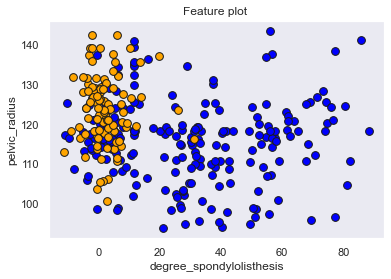

In [196]:
 
plt.figure()
for i in range (len(X)):
    if label[i]==0 :
        plt.scatter(X.degree_spondylolisthesis[i], X.pelvic_radius[i], color = 'blue',edgecolors='k', s=60) 
    if label[i]== 1 :
        plt.scatter(X.degree_spondylolisthesis[i], X.pelvic_radius[i], color = 'orange',edgecolors='k', s=60) 
plt.xlabel('degree_spondylolisthesis')
plt.ylabel('pelvic_radius')   
plt.title('Feature plot ' )
plt.grid()
plt.show()


 3D plot (# degree_spondylolisthesis Vs pelvic_radius  Vs sacral_slope) 

Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.


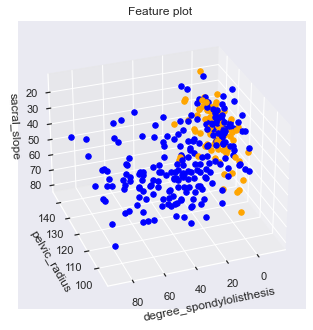

In [197]:

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(5)
ax = Axes3D(fig, elev=-150, azim=110)

for i in range (len(score_PCA)):
    if label[i]==0 :
        ax.scatter(X.degree_spondylolisthesis[i], X.pelvic_radius[i], X.sacral_slope[i] ,color = 'blue', s=30) 
        
    if label[i]== 1 :
        ax.scatter(X.degree_spondylolisthesis[i], X.pelvic_radius[i], X.sacral_slope[i] ,color = 'orange', s=30)        
ax.set_title("First three PCA ")
ax.set_xlabel('degree_spondylolisthesis')
ax.set_ylabel('pelvic_radius') 
ax.set_zlabel('sacral_slope')
plt.title('Feature plot ' )
plt.show()

# Binary Classifier

Random Forest Classifier Results 

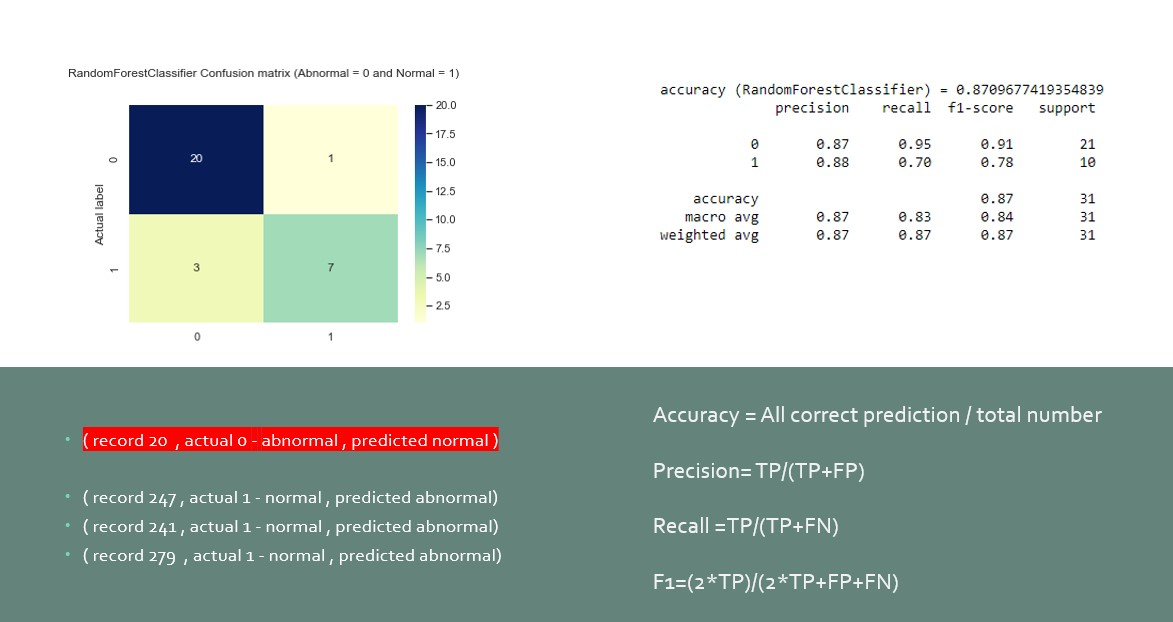

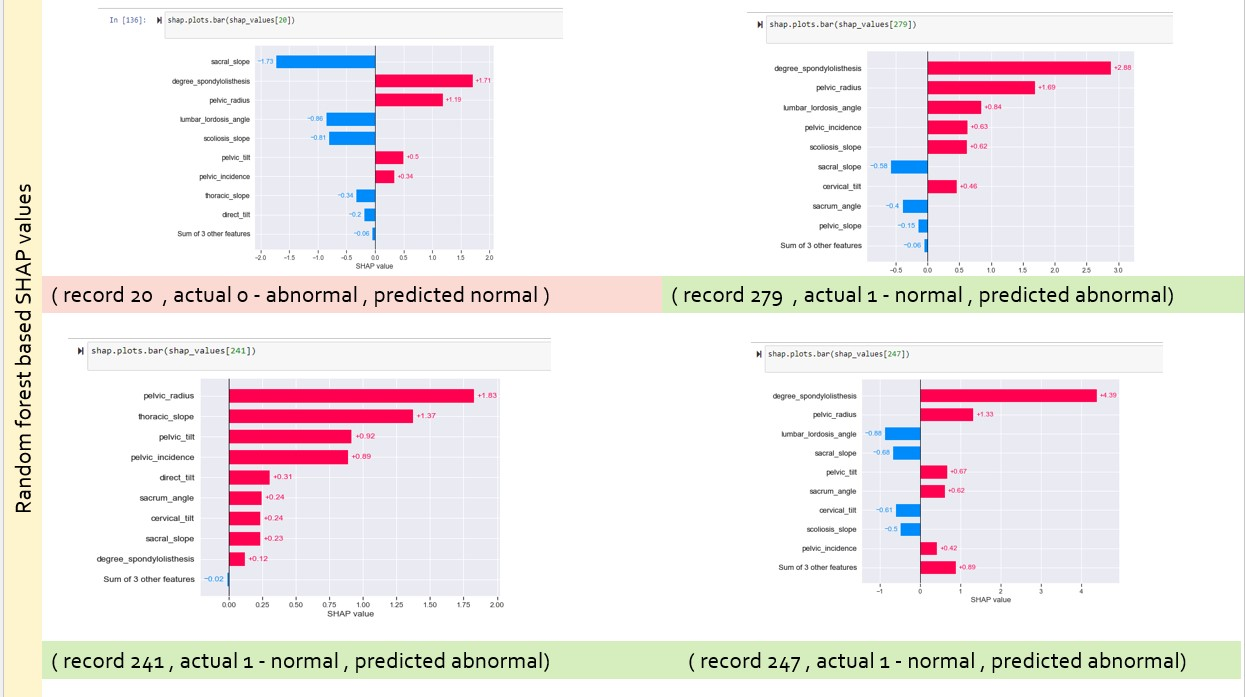

# Code Section for Binary Classifiers 

Split Data into test and val 

In [198]:
X = scaled_df
y = label 

X_train, X_val, y_train, y_val  = train_test_split(X,y,test_size=0.1,random_state=42, stratify=y)

print('Number of training data ', len(X_train))
print('Number of validation data ', len(X_val))

Number of training data  279
Number of validation data  31


# RandomForestClassifier

In [199]:
from sklearn.ensemble import RandomForestClassifier
Rand_forest_model = RandomForestClassifier(random_state=0).fit(X_train, y_train)

pred_randForst = Rand_forest_model.fit(X_train, y_train).predict(X_val)


 Referance for SHAP and RandonForest https://www.kaggle.com/code/dansbecker/shap-values/tutorial

Get the record that we want to check 

In [200]:
X_val

pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
106          0.551215     0.343561               0.504193      0.630329   
188          0.844328     0.518433               0.791764      0.507536   
121          0.818785     0.698679               0.843186      0.715164   
277          0.561747     0.433919               0.345844      0.590736   
99           0.459140     0.453108               0.316653      0.470877   
265          0.312339     0.337014               0.296399      0.380073   
151          0.310352     0.186149               0.511210      0.462757   
14           0.441818     0.728492               0.380429      0.297677   
198          0.690781     0.452753               0.561343      0.717319   
278          0.202320     0.044007               0.195780      0.427810   
116          0.628798     0.414675               0.558160      0.672831   
1            0.183082     0.349535               0.126987      0.235632   
92           0.839667     0.504679               0.664813      0.846404   
74           0.653451     0.698686               0.887667      0.539404   
279          0.321290     0.562962               0.438070      0.262591   
179          0.603806     0.518433               0.623166      0.089300   
52           0.341256     0.877931               0.254818      0.106781   
130          0.339229     0.324304               0.209449      0.415804   
20           0.252093     0.459966               0.274745      0.246923   
247          0.335845     0.528592               0.161394      0.297381   
87           0.266152     0.353773               0.353118      0.321556   
264          0.402156     0.262598               0.380429      0.517379   
209          0.313604     0.520036               0.257414      0.278547   
103          0.335192     0.253127               0.449598      0.451518   
226          0.536263     0.510473               0.566306      0.520618   
71           0.861628     0.962908               0.389586      0.612193   
233          0.206147     0.325057               0.196227      0.273908   
241          0.359972     0.442259               0.242091      0.371555   
149          0.753116     0.721945               0.308916      0.632279   
102          0.627596     0.440975               0.544128      0.656770   
284          0.468302     0.470287               0.336612      0.470960   

     pelvic_radius  degree_spondylolisthesis  pelvic_slope  direct_tilt  \
106       0.020982                  0.611467      0.149430     0.248061   
188       0.544402                  0.734878      0.808250     0.601049   
121       0.620710                  0.922042      0.435626     0.009167   
277       0.715910                  0.091346      0.727513     0.882898   
99        0.437603                  0.417133      0.399620     0.930989   
265       0.840834                  0.165240      0.860520     0.495671   
151       0.634845                  0.463551      0.821115     0.525099   
14        0.463507                  0.169336      0.415326     0.319307   
198       0.431465                  0.445155      0.822307     0.452258   
278       0.514222                  0.049160      0.455026     0.678785   
116       0.411038                  0.683986      0.824030     0.219747   
1         0.415357                  0.157231      0.413783     0.197208   
92        0.616172                  0.876400      0.043912     0.640131   
74        0.883212                  0.682996      0.826945     0.851734   
279       0.911562                  0.216396      0.102242     0.642648   
179       0.628179                  0.661732      0.378337     0.350006   
52        0.693831                  0.169071      0.028042     0.979783   
130       0.120722                  0.380686      0.710351     0.500739   
20        0.817527                  0.176227      0.278449     0.183226   
247       0.556330                  0.130551      0.486752     0.787151   
87        0.729588           

In [201]:
row_to_show = 18
data_for_prediction = X_val.iloc[row_to_show]  
data_for_prediction_array = data_for_prediction.values.reshape(1, -1)

data_for_prediction

pelvic_incidence            0.252093
pelvic_tilt                 0.459966
lumbar_lordosis_angle       0.274745
sacral_slope                0.246923
pelvic_radius               0.817527
degree_spondylolisthesis    0.176227
pelvic_slope                0.278449
direct_tilt                 0.183226
thoracic_slope              0.802421
cervical_tilt               0.336652
sacrum_angle                0.717016
scoliosis_slope             0.414075
Name: 20, dtype: float64

In [202]:
# Summary Notes : ( start counting from 0 onwards to get the number until 31)

# Based on Random Forest classifier ( records that was prodcted wrongly and few among correct samples  )

# 1)  row_to_show = 18 ( record 20  , actual 0 - abnormal , predicted normal )    (Not okay)


# 2) row_to_show = 19   ( record 247 , actual 1 - normal , predicted abnormal)   (Not okay, but may be acceptable) 
# 3) row_to_show = 27   ( record 241 , actual 1 - normal , predicted abnormal)   (Not okay, but may be acceptable) 
# 4) row_to_show =  14   ( record 279  , actual 1 - normal , predicted abnormal)   (Not okay, but may be acceptable) 

#  From Rest 
#  row_to_show = 29 ( record 102 , actual 0 - abnormal , predicted Abnormal )   (Okay)
#  row_to_show = 3  ( record 277 , actual 1 - normal , predicted Normal )   (Okay)


In [203]:
Rand_forest_model.predict_proba(data_for_prediction_array)

array([[0.41, 0.59]])

In [204]:
import shap  # package used to calculate Shap values
shap.initjs()    # for javascript 
explainer = shap.TreeExplainer(Rand_forest_model)   # Create object that can calculate shap values
shap_values = explainer.shap_values(data_for_prediction)  # Calculate Shap values

In [205]:
#Visualize a single prediction

In [206]:
shap.force_plot(explainer.expected_value[1], shap_values[1], data_for_prediction)

shap.plots.bar(shap_values)

shap.plots.bar(shap_values[241])


In [ ]:

cnf_matrix = metrics.confusion_matrix(y_val, pred_randForst)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('RandomForestClassifier Confusion matrix (Abnormal = 0 and Normal = 1)', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print('accuracy (RandomForestClassifier) =', accuracy_score(y_val, pred_randForst))
print(classification_report(y_val, pred_randForst))

In [ ]:
# Store the reslts as a dataframe and save to as excel  
pred=pd.DataFrame(X_val)
pred['actual']= y_val
pred['prediction']= pred_randForst
pred['differance'] = y_val-pred_randForst

pred

# XGBoost 

accuracy  = 0.9032258064516129
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        21
           1       0.89      0.80      0.84        10

    accuracy                           0.90        31
   macro avg       0.90      0.88      0.89        31
weighted avg       0.90      0.90      0.90        31



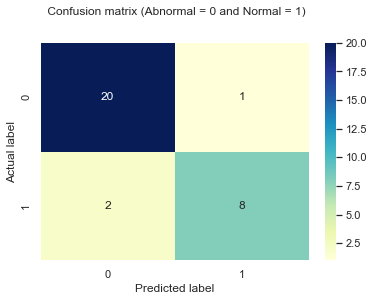

In [209]:
# Import xgboost
import numpy as np 
import pandas as pd
import xgboost as xgb 
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val  = train_test_split(X,y,test_size=0.1,random_state=42, stratify=y)
# Create the training and test sets
#X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=123)

# Instantiate the XGBClassifier: xg_cl
xg_cl = xgb.XGBClassifier(objective='binary:logistic', n_estimators=10, seed=123)

# Fit the classifier to the training set
xg_cl.fit(X_train, y_train)

# Predict the labels of the test set: preds
preds = xg_cl.predict(X_val)

cnf_matrix = metrics.confusion_matrix(y_val, preds)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title(' Confusion matrix (Abnormal = 0 and Normal = 1)', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print('accuracy  =', accuracy_score(y_val, preds))

print(classification_report(y_val, preds))

# KNN 

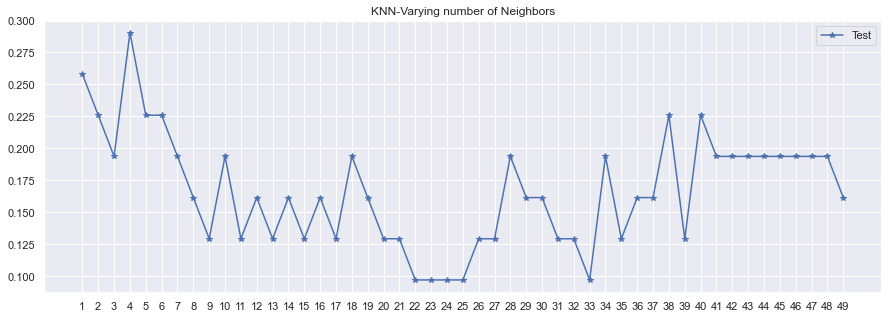

In [210]:
error=[]
    
# get the error for different values of K 

for k in range(1,50):    # maximum value of K neigbours can be upto len(y_train) 
    knn=KNeighborsClassifier(k)
    knn.fit(X_train,y_train)      # feed the model DataX and target Y
   
    y_test_pred = knn.predict(X_val)   # send the new samples that are not used for modeling 
    error.append(mean_squared_error(y_val,y_test_pred ))
 

# Plotting the test and train score 
import matplotlib
plt.figure(figsize=(15,5))
plt.title('KNN-Varying number of Neighbors')
plt.plot(range(1,50),error,label="Test", marker='*')
plt.legend()
plt.xticks(range(1,50))
plt.show()

accuracy (KNN) = 0.9032258064516129
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        21
           1       0.89      0.80      0.84        10

    accuracy                           0.90        31
   macro avg       0.90      0.88      0.89        31
weighted avg       0.90      0.90      0.90        31



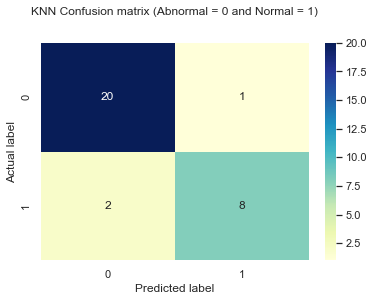

In [211]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(22)

knn.fit(X_train,y_train)
knn.score(X_val,y_val)

y_KNN_pred = knn.predict(X_val)


cnf_matrix = metrics.confusion_matrix(y_val, y_KNN_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('KNN Confusion matrix (Abnormal = 0 and Normal = 1)', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print('accuracy (KNN) =', accuracy_score(y_val, y_KNN_pred))

print(classification_report(y_val, y_KNN_pred))

In [ ]:
# Summary Notes : ( start counting from 0 onwards to get the number until 31)

# Based on KNN classifier ( records that was prodcted wrongly and few among correct samples  )

# 1)  row_to_show = 18 ( record 20  , actual 0 - abnormal , predicted normal )    (Not okay)


# 2) row_to_show = 19   ( record 247 , actual 1 - normal , predicted abnormal)   (Not okay, but may be acceptable) 
# 3) row_to_show = 30   ( record 284 , actual 1 - normal , predicted abnormal)   (Not okay, but may be acceptable) -New one 

#  row_to_show =  14   ( record 279  , actual 1 - normal , predicted abnormal)   (Got corrected in KNN) 
#  row_to_show = 27   ( record 241 , actual 1 - normal , predicted normal)   (Got corrected in KNN)

#  From Rest 
#  row_to_show = 29 ( record 102 , actual 0 - abnormal , predicted Abnormal )   (Okay)
#  row_to_show = 3  ( record 277 , actual 1 - normal , predicted Normal )   (Okay)

@ Select the best K for final KNN classifier model 

In [ ]:
# Store the reslts as a dataframe and save to as excel  
pred=pd.DataFrame(X_val)
pred['actual']= y_val
pred['prediction']= y_KNN_pred
pred['differance'] = y_val-y_KNN_pred

pred

@ Feedback of classifiers  :  one case was misleading (record 20) in terms of clinical treatment taken by patients based on this classfifer. 

# Conclusion 

# Record that is of concern (record 20) 
( record 20  , actual 0 - abnormal , predicted normal )

 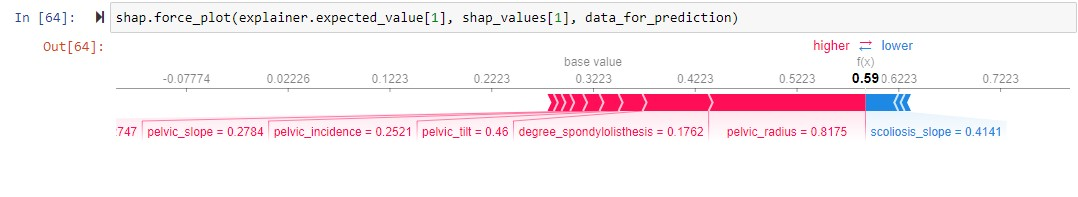

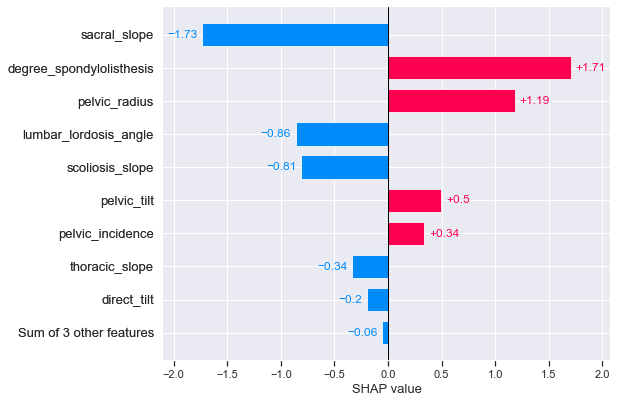

# Feature importance 

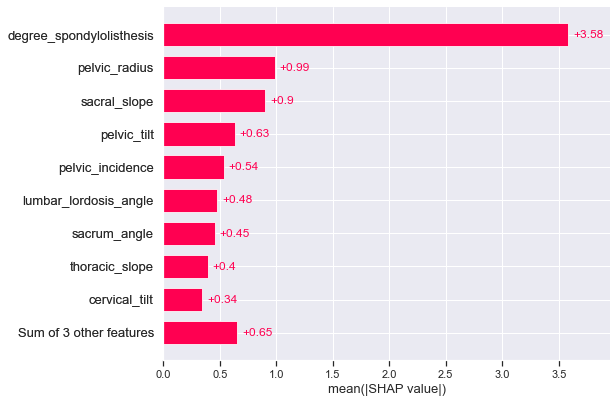

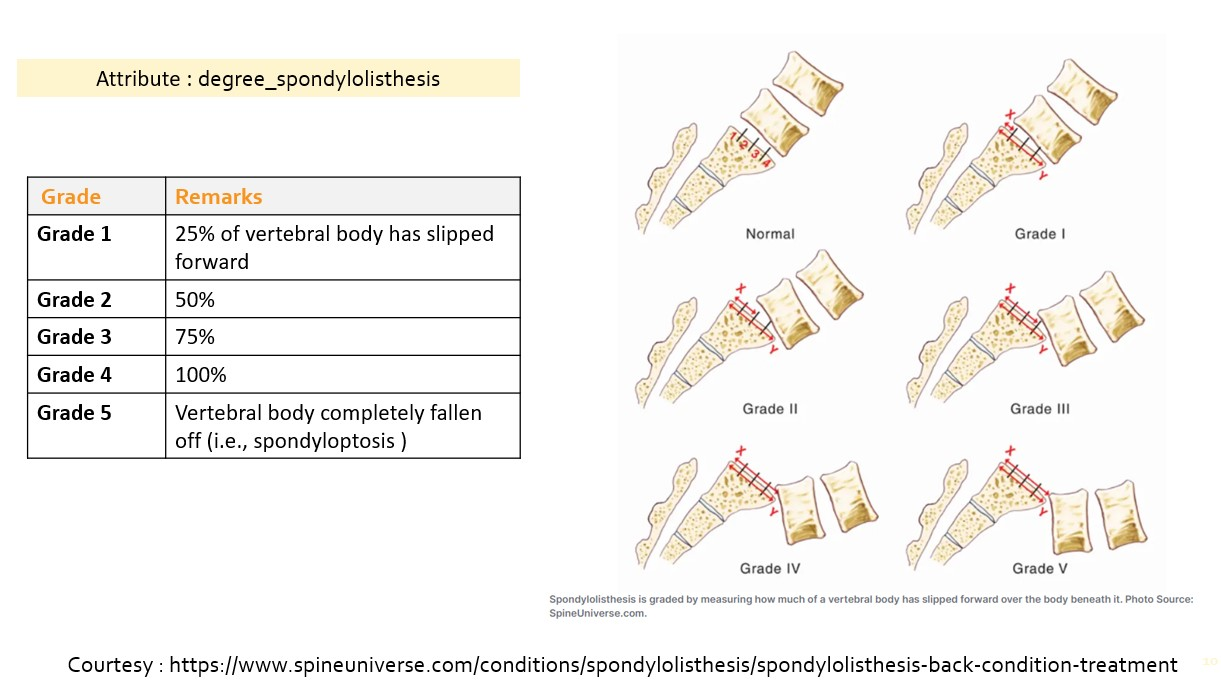

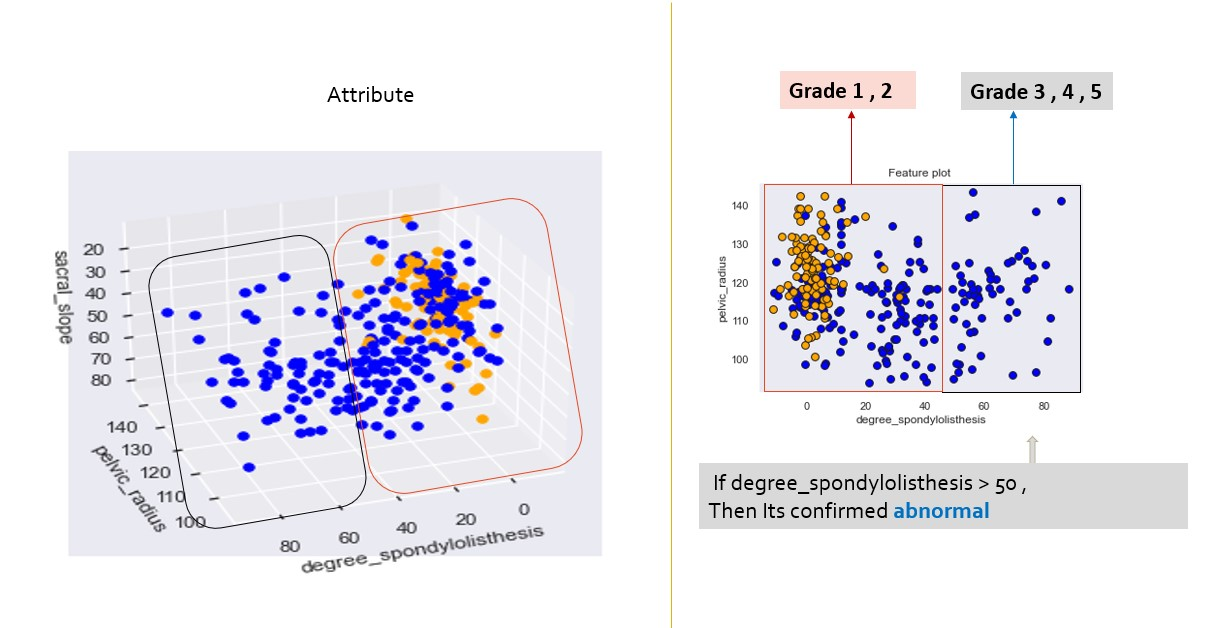

# Dataset can be reprepared based on "Col6" : "degree_spondylolisthesis" 

## Referances : 

https://www.kaggle.com/sammy123/lower-back-pain-symptoms-dataset

https://github.com/ShaileshDhama/KNN-on-Lower-Back-Pain-Symptoms-Dataset/blob/master/knn-on-lower-back-pain-symptoms.ipynb

https://towardsdatascience.com/an-exploratory-data-analysis-on-lower-back-pain-6283d0b0123

https://github.com/slundberg/shap#citations

https://www.kaggle.com/code/dansbecker/shap-values/tutorial

https://www.spineuniverse.com/conditions/spondylolisthesis/spondylolisthesis-back-condition-treatment

https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/tree_based_models/Scatter%20Density%20vs.%20Violin%20Plot%20Comparison.html

Raihan-Al-Masud, M., & Mondal, M. R. H. (2020). Data-driven diagnosis of spinal abnormalities using feature selection and machine learning algorithms. PLOS ONE, 15(2), e0228422. https://doi.org/10.1371/journal.pone.0228422 
